In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
# Function and gradient
def f(x, y):
    return x**3 + y**3 + x**2 * y + y**2 * x

def grad_f(x, y):
    df_dx = 3*x**2 + 2*x*y + y**2
    df_dy = 3*y**2 + 2*y*x + x**2
    return np.array([df_dx, df_dy])

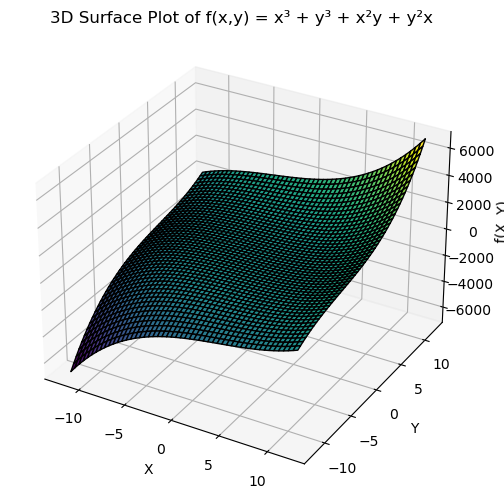

In [37]:
# Function and gradient
def f(x, y):
    return x**3 + y**3 + x**2 * y + y**2 * x

# Create meshgrid
x = np.linspace(-12, 12, 2000)
y = np.linspace(-12, 12, 2000)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')



# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('3D Surface Plot of f(x,y) = x³ + y³ + x²y + y²x')

plt.show()

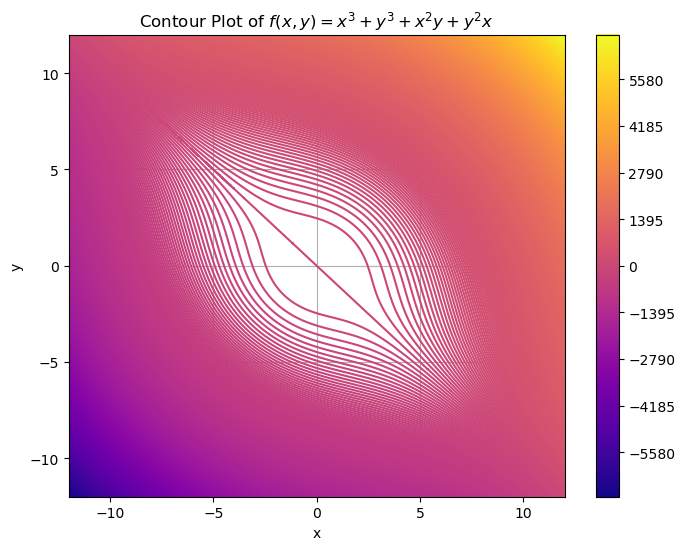

In [40]:
#Plot the contour
plt.figure(figsize=(8,6))
contours = plt.contour(X, Y, Z, levels=1000, cmap='plasma')
plt.colorbar(contours)
plt.title(r'Contour Plot of $f(x,y) = x^3 + y^3 + x^2y + y^2x$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [14]:
# Gradient Descent
def gradient_descent(lr=0.01, epochs=100):
    x, y = 2.0, 2.0
    history = []
    for _ in range(epochs):
        grad = grad_f(x, y)
        x -= lr * grad[0]
        y -= lr * grad[1]
        history.append(f(x, y))
    return history

In [15]:
# Stochastic Gradient Descent
def stochastic_gradient_descent(lr=0.01, epochs=100):
    x, y = 2.0, 2.0
    history = []
    for _ in range(epochs):
        grad = grad_f(x, y)
        x -= lr * grad[0] + np.random.normal(0, 0.1)
        y -= lr * grad[1] + np.random.normal(0, 0.1)
        history.append(f(x, y))
    return history

In [16]:
# ADAM Optimizer
def adam(lr=0.01, epochs=100, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x, y = 2.0, 2.0
    m, v = np.zeros(2), np.zeros(2)
    history = []
    for t in range(1, epochs+1):
        grad = grad_f(x, y)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad**2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x -= lr * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
        y -= lr * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
        history.append(f(x, y))
    return history

In [17]:

# Run optimization methods
gd_hist = gradient_descent()
sgd_hist = stochastic_gradient_descent()
adam_hist = adam()

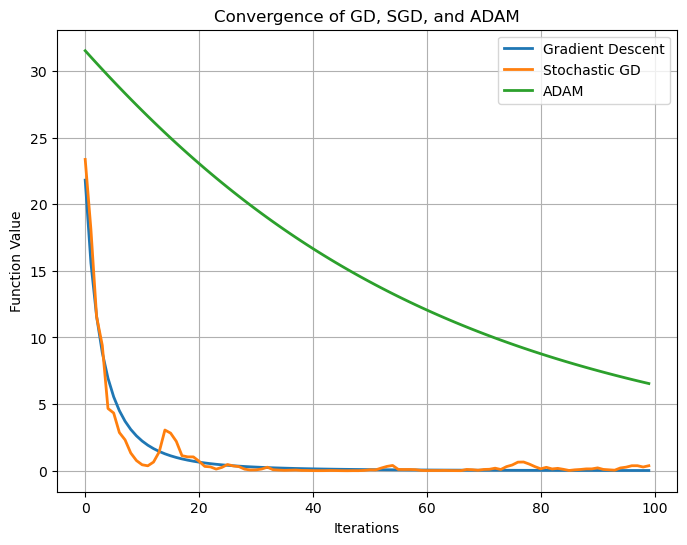

In [18]:
# Plot convergence
plt.figure(figsize=(8, 6))
plt.plot(gd_hist, label='Gradient Descent', linewidth=2)
plt.plot(sgd_hist, label='Stochastic GD', linewidth=2)
plt.plot(adam_hist, label='ADAM', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('Convergence of GD, SGD, and ADAM')
plt.legend()
plt.grid()
plt.show()

# ADAM may fail to converge effectively due to the following reasons:

# 1. Sharp Curvature and Saddle Points
 
###  The function contains terms like $x^3$ and $y^3$, which introduce regions with sharp gradients as well as flat regions.

###  The presence of $x^2y$+ $y^2x$ introduces saddle points where gradients are small or zero in certain directions.

###  ADAM relies on adaptive learning rates that can struggle when encountering such saddle points, leading to slow convergence or divergence.

# 2. Excessive Adaptive Learning Rate Adjustments

### *ADAM computes an exponentially decaying average of past gradients (first moment) and squared gradients (second moment). If gradients fluctuate significantly, ADAM may make overly conservative updates.

### *In functions with high curvature, ADAM's updates may be inconsistent, causing oscillations or premature stagnation.

### *GD, with a well-chosen learning rate, may behave more predictably, while SGD (especially with momentum) can escape poor local regions more efficiently.

# 3. Vanishing and Exploding Gradient Effects

### *The cubic terms in the function cause gradients to be very large in some regions and near zero in others.

### *ADAM’s squared gradient tracking can cause it to slow down updates too much in regions with vanishing gradients, whereas GD and SGD may still progress due to constant step sizes.

# 4. Over-Smoothing Effect of ADAM

### *ADAM often smooths out updates due to the way it adapts the learning rate per parameter. In functions with sharp changes in curvature, this smoothing effect can prevent effective movement towards the optimal solution.

### *GD and SGD, by contrast, apply more direct updates, which might work better for such a function.